In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# import the pumpage data
df = pd.read_excel(r'C:\Users\Pu\Documents\GitHub\GEO572-Project-E.St.Louis\pumping\Pumpage_Data_ESL.xlsx')

In [33]:
# transform the unit into MGD
df_pump = df.iloc[:,7:]
df_pump = df_pump/10**6/365.25
df.iloc[:,7:] = df_pump

In [35]:
# replace all 0 value to be nan and drop a row if all pumpage is nan
df.replace(0,np.nan)
year_list = range(1981,2020)
year_list_str = [str(i) for i in year_list]
# print(year_list_str)
list_drop = []  # drop lines with no pumpage records
for ind, row in df.iterrows():
    if df.iloc[ind, 7:].isnull().values.all():
        list_drop.append(ind)
df = df.drop(list_drop)
# df = df.dropna(axis=0,how='all',subset=year_list_str)
# reset index
df = df.reset_index(drop=True)

In [36]:
# calculate the sum of pumpage based on each facility
df_fac_pump = df.iloc[:,2:]
df_fac_pump = df_fac_pump.drop(['fac_well_num','depth_total_last_known','lam_x','lam_y'],axis=1)
df_fac_pump = df_fac_pump.groupby(['owner'], as_index=False).sum()

print(df_fac_pump)
df_fac_pump_copy = df_fac_pump.copy()

                              owner       1981       1982       1983  \
0                          ALHAMBRA   0.053388   0.054757   0.060233   
1                    ALTON STEEL CO   2.446324   2.212183   2.209446   
2                   AMERICAN CAN CO   0.008214   0.000000   0.000000   
3    AMERICAN COLLOID PROCESSING SA   0.000657   0.000055   0.000427   
4         ARCHER-DANIELS-MIDLAND CO   0.000000   0.000000   0.000000   
..                              ...        ...        ...        ...   
98             VIRGIL GUMMERSHEIMER   0.000000   0.000000   0.000000   
99                 WITTENAUER FARMS   0.000000   0.000000   0.000000   
100                      WOOD RIVER   1.311214   1.261829   1.275272   
101             WOOD RIVER REFINERY  11.983573  13.108830  11.832991   
102                          WORDEN   0.056961   0.046804   0.055488   

          1984       1985       1986       1987       1988       1989  ...  \
0     0.064339   0.064641   0.065708   0.062971   0.06844

In [37]:
def pump_modified_plot(irow,df1,df_fac_pump_copy):
    year_list = range(1981,2020)
    for j in range(103):
        if df_fac_pump_copy.iloc[j,0] == df1.iloc[irow,0]:
            break
    pump = df_fac_pump_copy.iloc[j,1:]
    pump_new = df1.iloc[irow,1:]
    plt.figure(figsize=(9,6),facecolor="white")
    plt.scatter(year_list,pump,label='original pumpage')
    plt.scatter(year_list,pump_new,label='outliers removed')
    plt.title('pumpage of' + ' ' + df_fac_pump_copy.iloc[j,0])
    plt.ylabel('pumpage (MGD)')
    plt.xlabel('year')
    plt.legend()

Text(0.5, 0, 'year')

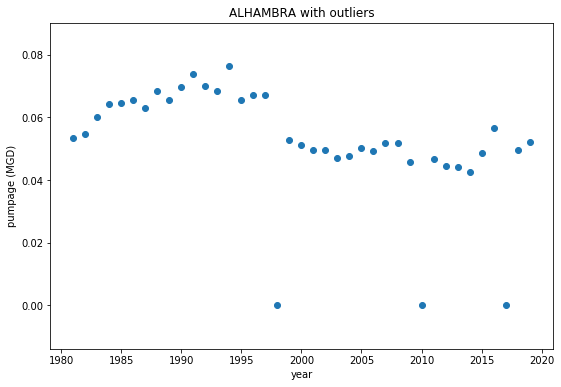

In [38]:
year_list = range(1981,2020)
pump1 = df_fac_pump.iloc[0,1:]
# pump2 = df_fac_pump.iloc[102,1:]
# pump3 = df_fac_pump.iloc[103,1:]
plt.figure(figsize=(9,6))
plt.title('ALHAMBRA with outliers')
plt.scatter(year_list,pump1)
plt.ylabel('pumpage (MGD)')
plt.xlabel('year')
# df_fac_pump.iloc[0,1:].plot()
# plt.show()

In [39]:
print(pump1.mean())

0.05257559451727829


In [40]:
for i in range(102):
    a = df_fac_pump.iloc[i,1:].mean()
    for j in range(1,39):
        # identify outliers and replace with nan
        if 10*df_fac_pump.iloc[i,j]<a or df_fac_pump.iloc[i,j]>10*a:
            df_fac_pump.iloc[i,j] = np.nan

# do interpolation and forward fill for gaps
df_fac_pump.iloc[:,1:] = df_fac_pump.iloc[:,1:].replace(0,np.nan)
df_fac_pump.iloc[:,1:] = df_fac_pump.iloc[:,1:].interpolate(method='linear', limit_direction='forward', axis=1)  
list_drop = []  # drop lines with no pumpage records in facility level
for ind, row in df_fac_pump.iterrows():
    if df_fac_pump.iloc[ind, 1:].isnull().values.all():
        list_drop.append(ind)
df1 = df_fac_pump.drop(list_drop)
df1 = df1.reset_index(drop=True)
# print(df1.head())

In [41]:
# import the modified data into a csv file
df1.to_csv('modified_facility_pump.csv')

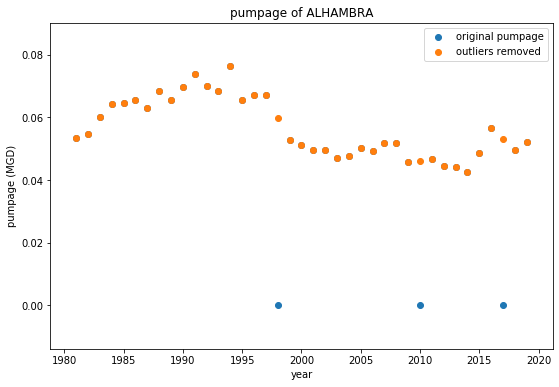

In [42]:
pump_modified_plot(0,df1,df_fac_pump_copy)

# 5 facilities with greated demand

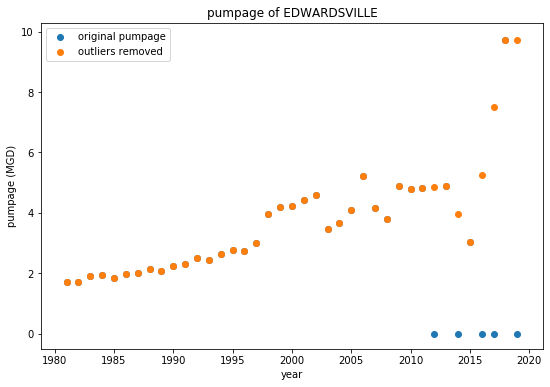

In [43]:
pump_modified_plot(19,df1,df_fac_pump_copy)

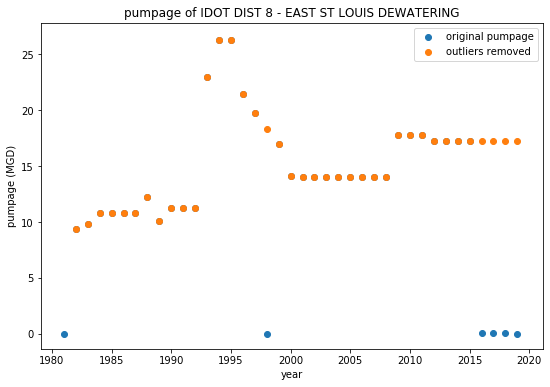

In [44]:
pump_modified_plot(30,df1,df_fac_pump_copy)

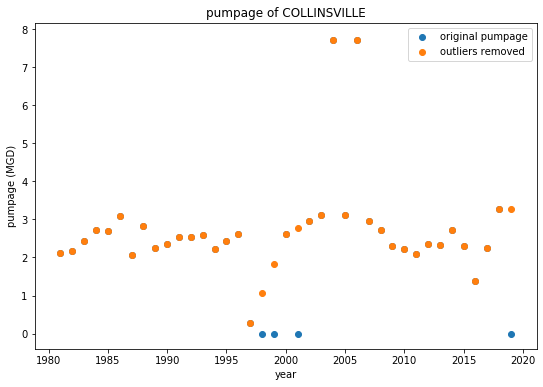

In [45]:
pump_modified_plot(11,df1,df_fac_pump_copy)

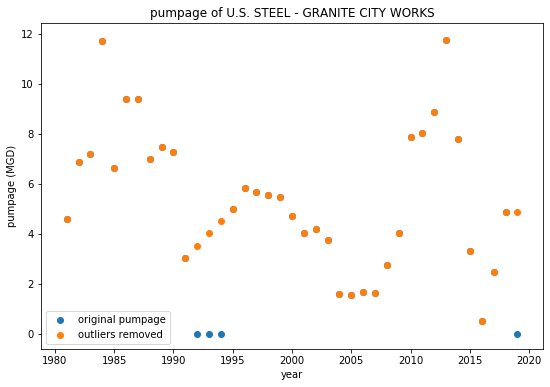

In [46]:
pump_modified_plot(70,df1,df_fac_pump_copy)

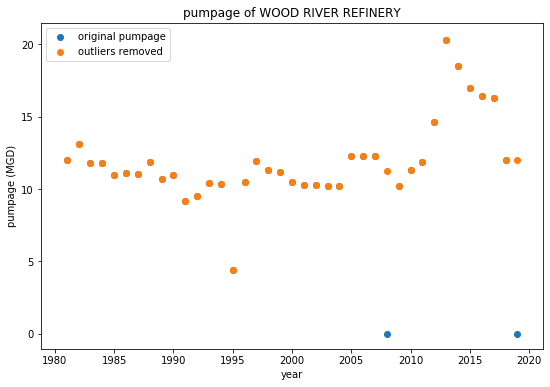

In [47]:
pump_modified_plot(75,df1,df_fac_pump_copy)